In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

In [6]:
book = pd.read_csv("Project_dataset/books_data.csv")
rating = pd.read_csv("Project_dataset/Books_rating.csv")

In [7]:
books = pd.merge(book,rating, on = 'Title')
books.shape

(3000000, 19)

In [9]:
books.drop_duplicates(inplace = True)
books.shape

(2991226, 19)

In [11]:
books.isna().sum()

Title                     208
description            638314
authors                389373
image                  538679
previewLink            329541
publisher              780240
publishedDate          353315
infoLink               329541
categories             549679
ratingsCount          1357238
Id                          0
Price                 2510854
User_id                558559
profileName            558677
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [12]:
books.dropna(inplace = True)
books.isna().sum()

Title                 0
description           0
authors               0
image                 0
previewLink           0
publisher             0
publishedDate         0
infoLink              0
categories            0
ratingsCount          0
Id                    0
Price                 0
User_id               0
profileName           0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64

In [13]:
books.shape

(174084, 19)

In [14]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174084 entries, 47 to 2999995
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               174084 non-null  object 
 1   description         174084 non-null  object 
 2   authors             174084 non-null  object 
 3   image               174084 non-null  object 
 4   previewLink         174084 non-null  object 
 5   publisher           174084 non-null  object 
 6   publishedDate       174084 non-null  object 
 7   infoLink            174084 non-null  object 
 8   categories          174084 non-null  object 
 9   ratingsCount        174084 non-null  float64
 10  Id                  174084 non-null  object 
 11  Price               174084 non-null  float64
 12  User_id             174084 non-null  object 
 13  profileName         174084 non-null  object 
 14  review/helpfulness  174084 non-null  object 
 15  review/score        174084 non-null  

In [15]:
books.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,Id,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
47,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,0802841899,25.97,ARI272XF8TOL4,Christopher J. Bray,74/81,5.0,955411200,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...
48,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,0802841899,25.97,A36TPZSH8LBT1,haskell,2/3,5.0,1311465600,Early Christian development of the Church,Everett Ferguson approaches the subject of ear...
49,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,0802841899,25.97,ANX3DDV12ZRRU,GodsBreath.wordpress,2/3,4.0,1289952000,An Excellent Presentation of the Beliefs of th...,This book is a continual resource. It is so bi...
50,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,0802841899,25.97,A2H2LORTA5EZY2,Edward E. Howe,3/5,4.0,1266192000,Christ is Lord,This is a very useful and thorough text book. ...
195,The Battleship Bismarck,The Bismarck is perhaps the most famous – and ...,['Stefan Draminski'],http://books.google.com/books/content?id=nxttD...,http://books.google.nl/books?id=nxttDwAAQBAJ&p...,Bloomsbury Publishing,2018-09-20,https://play.google.com/store/books/details?id...,['History'],1.0,0887402216,34.95,A30IUAABSEHEPI,Lawrence Duckles,9/9,3.0,1055980800,The Battleship Bismarck reviewed,This book is both a history and a photo album ...


In [31]:
#Removing brackets and colons from authors name
books['authors'] = books['authors'].str.extract(r'\'(.*)\'')

In [32]:
books.authors

47         NaN
48         NaN
49         NaN
50         NaN
195        NaN
          ... 
2999984    NaN
2999992    NaN
2999993    NaN
2999994    NaN
2999995    NaN
Name: authors, Length: 174084, dtype: object

In [33]:
#Removes brackets and colons from categories
books['categories'] = books['categories'].str.extract(r'\'(.*)\'')

In [35]:
#Counting the length of each review
books['word_count'] = books['review/text'].apply(lambda x: len(x.split(' ')))

In [36]:
books.head(5)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,Id,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,word_count
47,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,NaN,http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,Religion,5.0,0802841899,25.97,ARI272XF8TOL4,Christopher J. Bray,74/81,5.0,955411200,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...,999
48,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,NaN,http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,Religion,5.0,0802841899,25.97,A36TPZSH8LBT1,haskell,2/3,5.0,1311465600,Early Christian development of the Church,Everett Ferguson approaches the subject of ear...,86
49,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,NaN,http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,Religion,5.0,0802841899,25.97,ANX3DDV12ZRRU,GodsBreath.wordpress,2/3,4.0,1289952000,An Excellent Presentation of the Beliefs of th...,This book is a continual resource. It is so bi...,31
50,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,NaN,http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,Religion,5.0,0802841899,25.97,A2H2LORTA5EZY2,Edward E. Howe,3/5,4.0,1266192000,Christ is Lord,This is a very useful and thorough text book. ...,25
195,The Battleship Bismarck,The Bismarck is perhaps the most famous – and ...,NaN,http://books.google.com/books/content?id=nxttD...,http://books.google.nl/books?id=nxttDwAAQBAJ&p...,Bloomsbury Publishing,2018-09-20,https://play.google.com/store/books/details?id...,History,1.0,0887402216,34.95,A30IUAABSEHEPI,Lawrence Duckles,9/9,3.0,1055980800,The Battleship Bismarck reviewed,This book is both a history and a photo album ...,328


## EDA

### Distribution of Books in Market based on Genre

In [47]:
#taking the top 10 
books.categories.value_counts().head(10)

categories
Fiction                      48105
Religion                     13081
Juvenile Fiction             11414
Biography & Autobiography    10138
History                       7374
Business & Economics          6130
Family & Relationships        5370
Cooking                       5196
Computers                     4930
Health & Fitness              3904
Name: count, dtype: int64

In [54]:
labels  = ["Fiction","Religion","Juvenile Fiction","Biography & Autobiography","History","Business & Economics","Family & Relationships","Cooking","Computers","Health & Fitness"]   

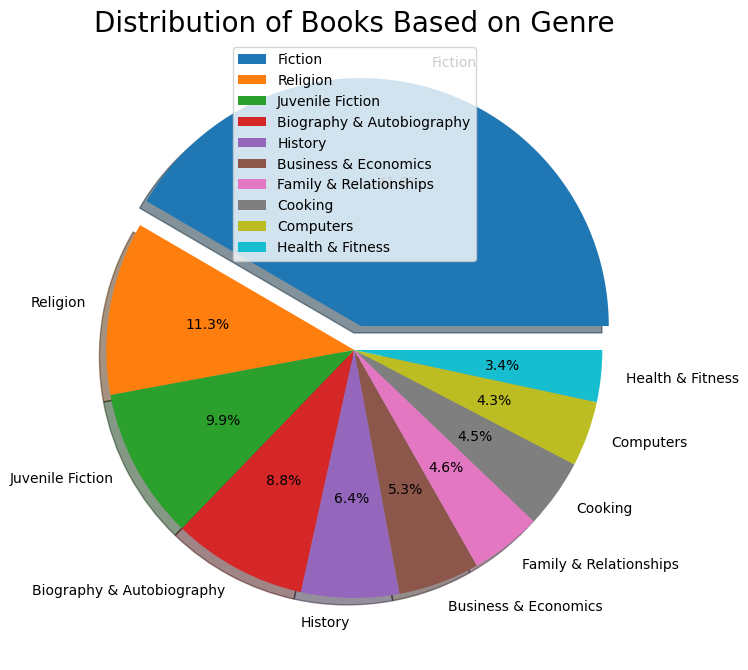

In [64]:
plt.figure(figsize=(8,10))
plt.pie(books['categories'].value_counts().head(10),explode=(0.1,0,0,0,0,0,0,0,0,0), labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Books Based on Genre', fontsize = 20)
plt.axis('off')
plt.legend(loc="best")
plt.show()

### Most frequent Words in over 3 rated Reviews

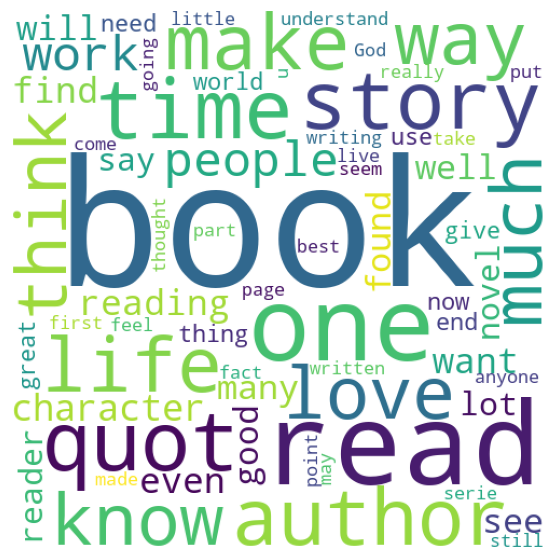

In [69]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam_wc = wc.generate(books[books['review/score'] > 0]['review/text'].str.cat(sep=" "))

plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(spam_wc)

In [71]:
books.columns

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount', 'Id',
       'Price', 'User_id', 'profileName', 'review/helpfulness', 'review/score',
       'review/time', 'review/summary', 'review/text', 'word_count'],
      dtype='object')

In [72]:
books.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,Id,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,word_count
47,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,NaN,http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,Religion,5.0,0802841899,25.97,ARI272XF8TOL4,Christopher J. Bray,74/81,5.0,955411200,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...,999
48,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,NaN,http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,Religion,5.0,0802841899,25.97,A36TPZSH8LBT1,haskell,2/3,5.0,1311465600,Early Christian development of the Church,Everett Ferguson approaches the subject of ear...,86
49,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,NaN,http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,Religion,5.0,0802841899,25.97,ANX3DDV12ZRRU,GodsBreath.wordpress,2/3,4.0,1289952000,An Excellent Presentation of the Beliefs of th...,This book is a continual resource. It is so bi...,31
50,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,NaN,http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,Religion,5.0,0802841899,25.97,A2H2LORTA5EZY2,Edward E. Howe,3/5,4.0,1266192000,Christ is Lord,This is a very useful and thorough text book. ...,25
195,The Battleship Bismarck,The Bismarck is perhaps the most famous – and ...,NaN,http://books.google.com/books/content?id=nxttD...,http://books.google.nl/books?id=nxttDwAAQBAJ&p...,Bloomsbury Publishing,2018-09-20,https://play.google.com/store/books/details?id...,History,1.0,0887402216,34.95,A30IUAABSEHEPI,Lawrence Duckles,9/9,3.0,1055980800,The Battleship Bismarck reviewed,This book is both a history and a photo album ...,328


### Sentimental Analysis

In [85]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [86]:
# Lower casing the reviews
books['clean_reviews'] = books['review/text'].str.lower()

In [87]:
# Calculating Polarity score of reviews
books['score'] = books['clean_reviews'].apply(lambda review: vader.polarity_scores(review))

In [88]:
# Extracting compound column
books['compound']  = books['score'].apply(lambda score_dict: score_dict['compound'])

In [89]:
books['Sentiment'] = books['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x < -0.05 else 'neutral')
books.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,...,review/helpfulness,review/score,review/time,review/summary,review/text,word_count,clean_reviews,score,compound,Sentiment
47,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,NaN,http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,Religion,5.0,...,74/81,5.0,955411200,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...,999,with the publication of everett ferguson's boo...,"{'neg': 0.011, 'neu': 0.861, 'pos': 0.128, 'co...",0.9989,positive
48,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,NaN,http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,Religion,5.0,...,2/3,5.0,1311465600,Early Christian development of the Church,Everett Ferguson approaches the subject of ear...,86,everett ferguson approaches the subject of ear...,"{'neg': 0.064, 'neu': 0.905, 'pos': 0.031, 'co...",-0.2498,negative
49,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,NaN,http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,Religion,5.0,...,2/3,4.0,1289952000,An Excellent Presentation of the Beliefs of th...,This book is a continual resource. It is so bi...,31,this book is a continual resource. it is so bi...,"{'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'comp...",0.8834,positive
50,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,NaN,http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,Religion,5.0,...,3/5,4.0,1266192000,Christ is Lord,This is a very useful and thorough text book. ...,25,this is a very useful and thorough text book. ...,"{'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'comp...",0.6901,positive
195,The Battleship Bismarck,The Bismarck is perhaps the most famous – and ...,NaN,http://books.google.com/books/content?id=nxttD...,http://books.google.nl/books?id=nxttDwAAQBAJ&p...,Bloomsbury Publishing,2018-09-20,https://play.google.com/store/books/details?id...,History,1.0,...,9/9,3.0,1055980800,The Battleship Bismarck reviewed,This book is both a history and a photo album ...,328,this book is both a history and a photo album ...,"{'neg': 0.114, 'neu': 0.823, 'pos': 0.063, 'co...",-0.9600,negative


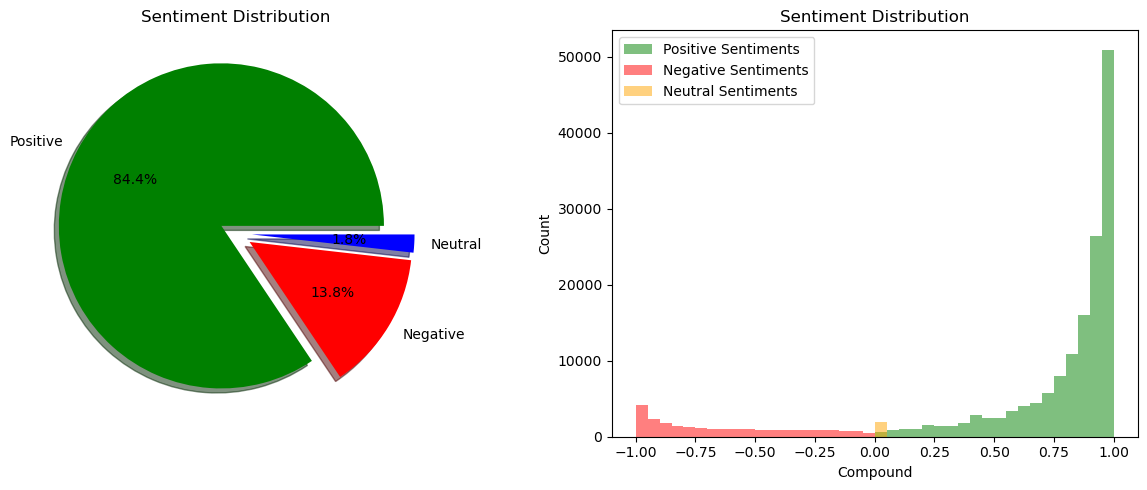

In [91]:
import matplotlib.pyplot as plt

# Create a figure and subplots with 1 row and 2 columns
plt.figure(figsize=(12, 5))

# Plot 1 - Pie chart for sentiment distribution
plt.subplot(1, 2, 1)
labels = ['Positive', 'Negative', 'Neutral']
sizes = books['Sentiment'].value_counts()
colors = ['green', 'red', 'blue']
explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Sentiment Distribution')

# Plot 2 - Histogram for sentiment distribution
plt.subplot(1, 2, 2)
positive = books[books['compound'] > 0]['compound']
negative = books[books['compound'] < 0]['compound']
neutral = books[books['compound'] == 0]['compound']

sentiments = [positive, negative, neutral]
colors = ['green', 'red', 'orange']
labels = ['Positive Sentiments', 'Negative Sentiments', 'Neutral Sentiments']

for sentiment, color, label in zip(sentiments, colors, labels):
    plt.hist(sentiment, bins=20, color=color, alpha=0.5, label=label)

plt.title('Sentiment Distribution')
plt.xlabel('Compound')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()